# This notebook serves as a demo of how to get the CO2 form factor


In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 14})

import sys
sys.path.append("..")

from ContrastEstimation import util, IntensityEstimation

In [5]:
# Get the molecule structure
"""
One can either define the molecule structure or 
use a PDB file to load existing structure
or just select some molecules
that I have saved to the module
"""
my_molecule = util.get_molecule_from_pdb("./oxygen.pdb")

# Show the source code of how I have defined a molecule for calculation.
util.show_formated_molecule_structure(my_molecule)

[
[ 'O', np.array([-2.094,1.031,-0.0]),],
[ 'O', np.array([-0.812,1.031,-0.0]),],
],


In [13]:
# Incident photon energy
q_list_A = np.linspace(0.01, 10, 1000)   # 2 pi / lambda

# Get the corresponding attenuation legnth
formfactor_list = np.array([IntensityEstimation.get_molecular_formfactor_for_uniform_sample(molecule_structure=my_molecule,
                                                                                   q_detector_in_A = q_list_A[x])
                   for x in range(1000)])

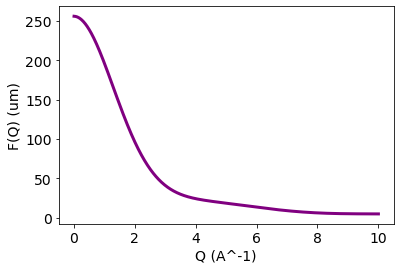

In [15]:
fig, axis = plt.subplots(ncols=1, nrows=1)

axis.plot(q_list_A, formfactor_list ** 2, c='purple', lw=3)

axis.set_xlabel("Q (A^-1)")
axis.set_ylabel("F(Q) (um)")
#axis.set_xlim([0, 4])
#axis.set_ylim([0, 500])
#axis.legend()
#plt.savefig("C:/Users/haoyuan/Desktop/formfactor.png",  transparent=True, dpi=600)
plt.show()

In [16]:
formfactor_list[0]

15.998585896871807

In [19]:
formfactor_list[np.argmin(np.abs(q_list_A - 1))]

14.033723580292266

In [20]:
formfactor_list[np.argmin(np.abs(q_list_A - 1))]

14.033723580292266

# Get the result for oxygen

In [21]:
# Get the molecule structure
"""
One can either define the molecule structure or 
use a PDB file to load existing structure
or just select some molecules
that I have saved to the module
"""
my_molecule_co2 = util.get_molecule_from_pdb("../pdb_files/co2.pdb")

# Show the source code of how I have defined a molecule for calculation.
util.show_formated_molecule_structure(my_molecule_co2)

[
[ 'C', np.array([-1.194,0.58,0.312]),],
[ 'O', np.array([0.122,0.548,0.312]),],
[ 'O', np.array([-2.51,0.611,0.312]),],
],


In [22]:
# Incident photon energy
q_list_A = np.linspace(0.01, 10, 1000)   # 2 pi / lambda

# Get the corresponding attenuation legnth
formfactor_list_co2 = np.array([IntensityEstimation.get_molecular_formfactor_for_uniform_sample(
    molecule_structure=my_molecule_co2,
    q_detector_in_A = q_list_A[x])
                   for x in range(1000)])

# Copmare the two scattering

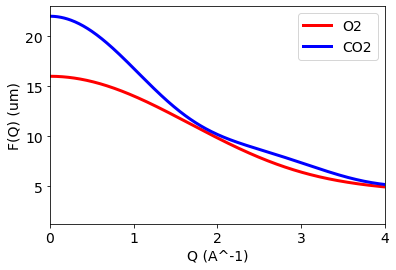

In [26]:
fig, axis = plt.subplots(ncols=1, nrows=1)

axis.plot(q_list_A, formfactor_list, c='red', lw=3, label="O2")
axis.plot(q_list_A, formfactor_list_co2, c='blue', lw=3, label="CO2")

axis.set_xlabel("Q (A^-1)")
axis.set_ylabel("F(Q) (um)")
axis.set_xlim([0, 4])
#axis.set_ylim([0, 500])
plt.legend()
#plt.savefig("C:/Users/haoyuan/Desktop/formfactor.png",  transparent=True, dpi=600)
plt.show()